In [14]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [15]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv("fcc-forum-pageviews.csv", parse_dates=[0], index_col=[0])

In [16]:
df.size

1304

In [17]:
# Clean data
df = df[(df["value"] >= df["value"].quantile(0.025)) &  (df["value"] <= df["value"].quantile(0.975))]

In [18]:
df.size

1238

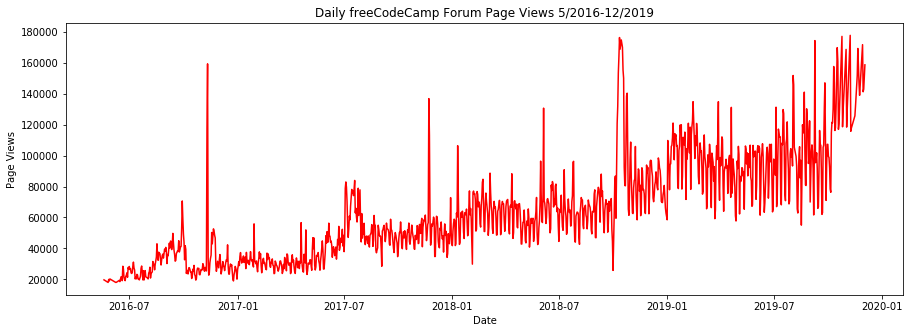

In [19]:
# Draw line plot
x, ax = plt.subplots(figsize=(15,5))
plt.title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
plt.xlabel("Date") ;plt.ylabel("Page Views")
plt.plot(df.index, df.value, color = 'r')

In [94]:
# Copy and modify data for monthly bar plot
df_bar = df.copy()
df_bar["year"] = df_bar.index.year ; df_bar["month_nbr"] = df_bar.index.month ; df_bar["month"] = df_bar.index.month_name()
df_bar = df_bar.groupby(["year","month_nbr","month"]).mean()
df_bar = df_bar.sort_values(by='month_nbr')
df_bar = df_bar.reset_index()

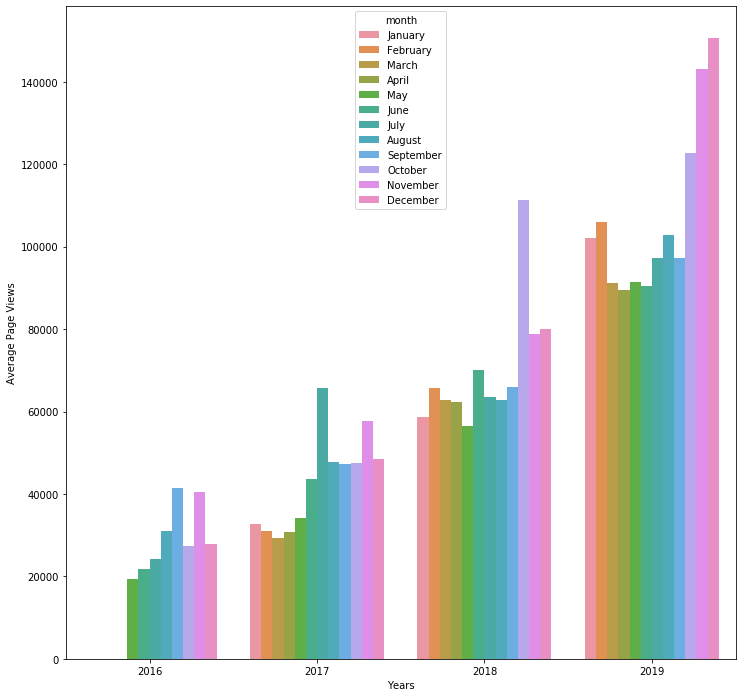

In [99]:
# Draw bar plot
fig = plt.subplots(figsize = (12,12))
fig = sns.barplot(x= 'year', y='value', hue='month', data=df_bar)
fig.set(xlabel = 'Years', ylabel = 'Average Page Views')
fig = fig.get_figure()
fig.savefig('teste.png')

In [55]:
# Prepare data for box plots (this part is done!)
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]
df_box['month_nbr'] = [d.strftime('%m') for d in df_box.date]
df_box = df_box.sort_values(by='month_nbr')

In [56]:
df_box.head()

,date,value,year,month,month_nbr
210,2017-01-06,37353,2017,Jan,01
937,2019-01-06,94108,2019,Jan,01
936,2019-01-05,77897,2019,Jan,01
935,2019-01-04,94514,2019,Jan,01
934,2019-01-03,100710,2019,Jan,01


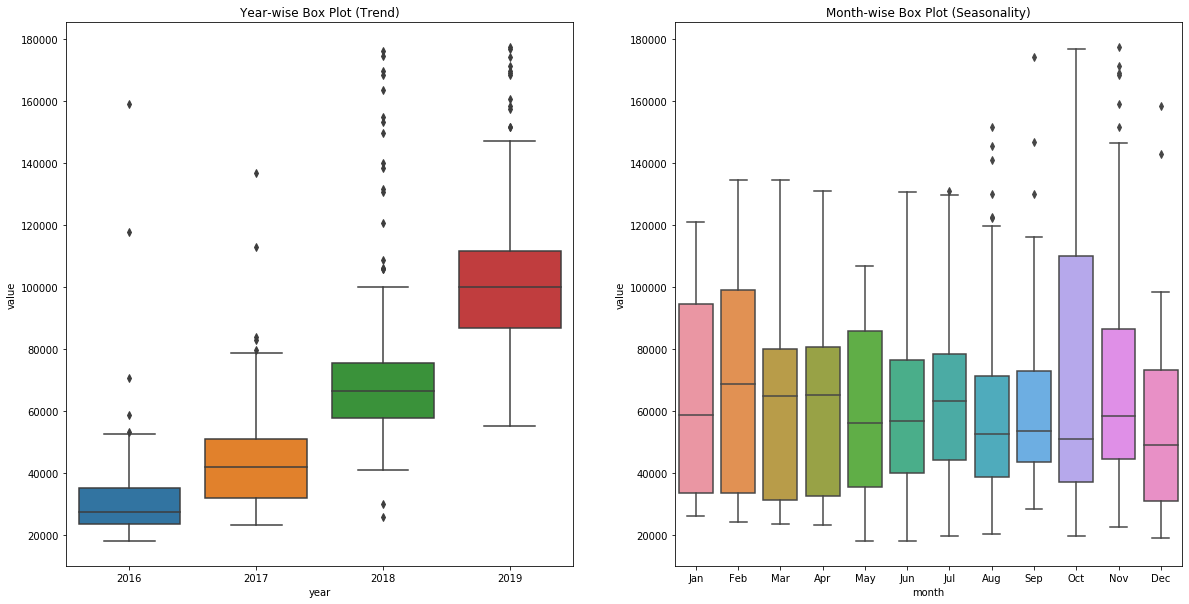

In [59]:
# Draw box plots (using Seaborn)
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_figwidth(20)
fig.set_figheight(10) 

ax1.set_title("Year-wise Box Plot (Trend)")
ax2.set_title("Month-wise Box Plot (Seasonality)")

ax1.set_xlabel('Year')
ax1.set_ylabel('Page Views')
ax1 = sns.boxplot(x=df_box.year, y=df_box.value, ax=ax1)

ax2.set_xlabel('Year')
ax2.set_ylabel('Page Views')
ax2 = sns.boxplot(x=df_box.month, y=df_box.value, ax=ax2)
